In [1]:
from manual_log_reg import ManualLogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [2]:
X = pd.read_csv('X_data.csv')
X.drop(columns=X.columns[0], axis=1, inplace=True)
X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


In [3]:
y = pd.read_csv('y_data.csv')  # read and convert to numpy
y.drop(columns=y.columns[0], axis=1, inplace=True)
y.head()

,y
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [4]:
X = X.values  # convert to numpy
y = y.values.astype(int).flatten()  # convert to numpy integers and flatten
X = np.concatenate((np.ones((len(y), 1)), X), axis=1) # add bias term

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=336546)

Implement the functions in manual_log_reg.py and train *log_reg* below. Use the *plot* flag in order to show reasonable learning (decrease of the training loss as a function of the iterations). Don't forget to make minor preprocessing so that gradient descent will be stable.

In [6]:
log_reg = ManualLogisticRegression()

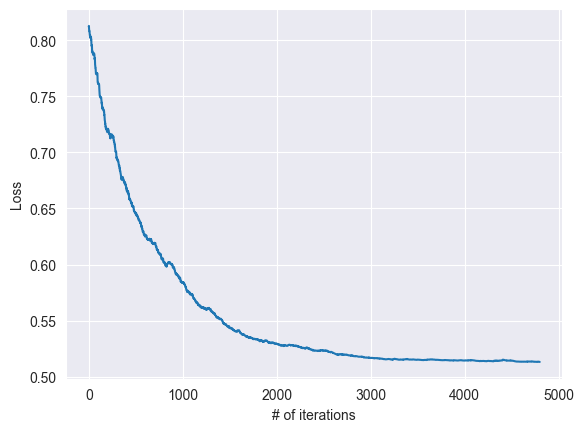

In [7]:
# ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#bias column turned into zeros when scaled,so we restore it back to ones (instead of scaling the original data and then concatenate the bias)
X_train_scaled[:,0] +=1
X_test_scaled = scaler.transform(X_test)
X_test_scaled[:,0] +=1
log_reg.fit(X_train_scaled,y_train,plot=True)
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba_test =log_reg.predict_proba(X_test_scaled)
# --------------------------------------------------------------------------------------

In [8]:
# checking bias column
X_train_scaled[:5,:]

array([[ 1.        , -0.85133875,  0.52308822,  0.63625122,  1.34010554],
       [ 1.        ,  0.31623144,  0.30614048,  1.23852106,  0.5128795 ],
       [ 1.        ,  2.70907073, -0.04337657,  1.32125121,  0.21818419],
       [ 1.        , -1.37778548, -0.94216486,  0.65218848,  0.07371466],
       [ 1.        ,  0.14987366, -0.33195355, -0.3133828 , -0.34722949]])

In [9]:
log_reg.conf_matrix(X_test_scaled,y_test)

array([[443., 141.],
       [166., 450.]])

In [10]:
from sklearn.linear_model import LogisticRegression
real_logreg=LogisticRegression()
real_logreg.fit(X_train_scaled,y_train)
y_pred_real=real_logreg.predict(X_test_scaled)
my_pred = log_reg.predict(X_test_scaled)
like_original_logreg=my_pred[my_pred==y_pred_real]
print(f'ManualLogisticRegression VS scikit learn LogisticRegression: {len(like_original_logreg) / len(y_pred_real) * 100:.2f}% same predictions ')

ManualLogisticRegression VS scikit learn LogisticRegression: 99.25% same predictions 


Sort the learned weights (excluding the bias term). Which of the features is the most important one?

In [11]:
# ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
w=log_reg.w
features =["bias",'Age', 'Systolic_BP', 'Diastolic_BP', 'Cholesterol']
w_df=pd.DataFrame(w,index=features).sort_values(by=0,ascending=False)
w_df.columns=['w']
w_df
# --------------------------------------------------------------------------------------

,w
Age,1.072774
Systolic_BP,0.676064
Cholesterol,0.563349
bias,0.090254
Diastolic_BP,-0.014421


## Age is the most important feature to our model - we can see that it has largest weight

Report the performance on the "correct dataset" using *conf_matrix* function. The required metrics are: TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1 and AUC. You may use functions seen in the tutorial but notice that one of the metrics can and should be called from *log_reg* itself.

In [12]:
# ------------------------ IMPLEMENT YOUR CODE HERE: ----------------------------------
calc_TN = lambda y_true, y_pred: log_reg.conf_matrix(X_test_scaled,y_test)[0, 0]
calc_FP = lambda y_true, y_pred: log_reg.conf_matrix(X_test_scaled,y_test)[0, 1]
calc_FN = lambda y_true, y_pred: log_reg.conf_matrix(X_test_scaled,y_test)[1, 0]
calc_TP = lambda y_true, y_pred: log_reg.conf_matrix(X_test_scaled,y_test)[1, 1]
def stats(y_test, y_pred_test):
    TN = calc_TN(y_test, y_pred_test)
    FP = calc_FP(y_test, y_pred_test)
    FN = calc_FN(y_test, y_pred_test)
    TP = calc_TP(y_test, y_pred_test)
    Se = TP/(TP+FN)
    Sp = TN/(TN+FP)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    Acc = (TP+TN)/(TP+TN+FP+FN)
    F1 = (2*Se*PPV)/(Se+PPV)
    return TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1
# --------------------------------------------------------------------------------------

In [13]:
[TN, FP, FN, TP, Se, Sp, PPV, NPV, Acc, F1] = stats(y_test,y_pred)
metrics_values=stats(y_test,y_pred)
print('Sensitivity is {:.4f}. \nSpecificity is {:.4f}. \nPPV is {:.4f}. \nNPV is {:.4f}. \nAccuracy is {:.4f}. \nF1 is {:.4f}. '.format(Se,Sp,PPV,NPV,Acc,F1))
mcc = ((TP * TN) - (FP * FN)) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
print('MCC is {:.4f}.'.format(mcc))
print('AUROC is {:.4f}.'.format(roc_auc_score(y_test, y_pred_proba_test)))
names = "TN,FP,FN,TP,Se,Sp,PPV,NPV"
names = names.split(',')
dict(zip(names,np.round(metrics_values,decimals=4)))

Sensitivity is 0.7305. 
Specificity is 0.7586. 
PPV is 0.7614. 
NPV is 0.7274. 
Accuracy is 0.7442. 
F1 is 0.7457. 
MCC is 0.4890.
AUROC is 0.8145.


{'TN': 443.0,
 'FP': 141.0,
 'FN': 166.0,
 'TP': 450.0,
 'Se': 0.7305,
 'Sp': 0.7586,
 'PPV': 0.7614,
 'NPV': 0.7274}